In [1]:
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

zip_path = './PlantDoc-Dataset-master_experiment2.zip'  
extract_dir = './'


os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [21]:
data_dir = './train'

classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))


print("Number of images per class:\n")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")


Number of images per class:

Tomato_Septoria_leaf_spot: 140
Potato___Early_blight: 108
Tomato_Bacterial_spot: 101
Tomato_Late_blight: 101
Potato___Late_blight: 97
Tomato_Leaf_Mold: 85
Tomato_Early_blight: 79
Tomato__Tomato_YellowLeaf__Curl_Virus: 70
Pepper__bell___Bacterial_spot: 62
Tomato_healthy: 55
Pepper__bell___healthy: 53
Tomato__Tomato_mosaic_virus: 44


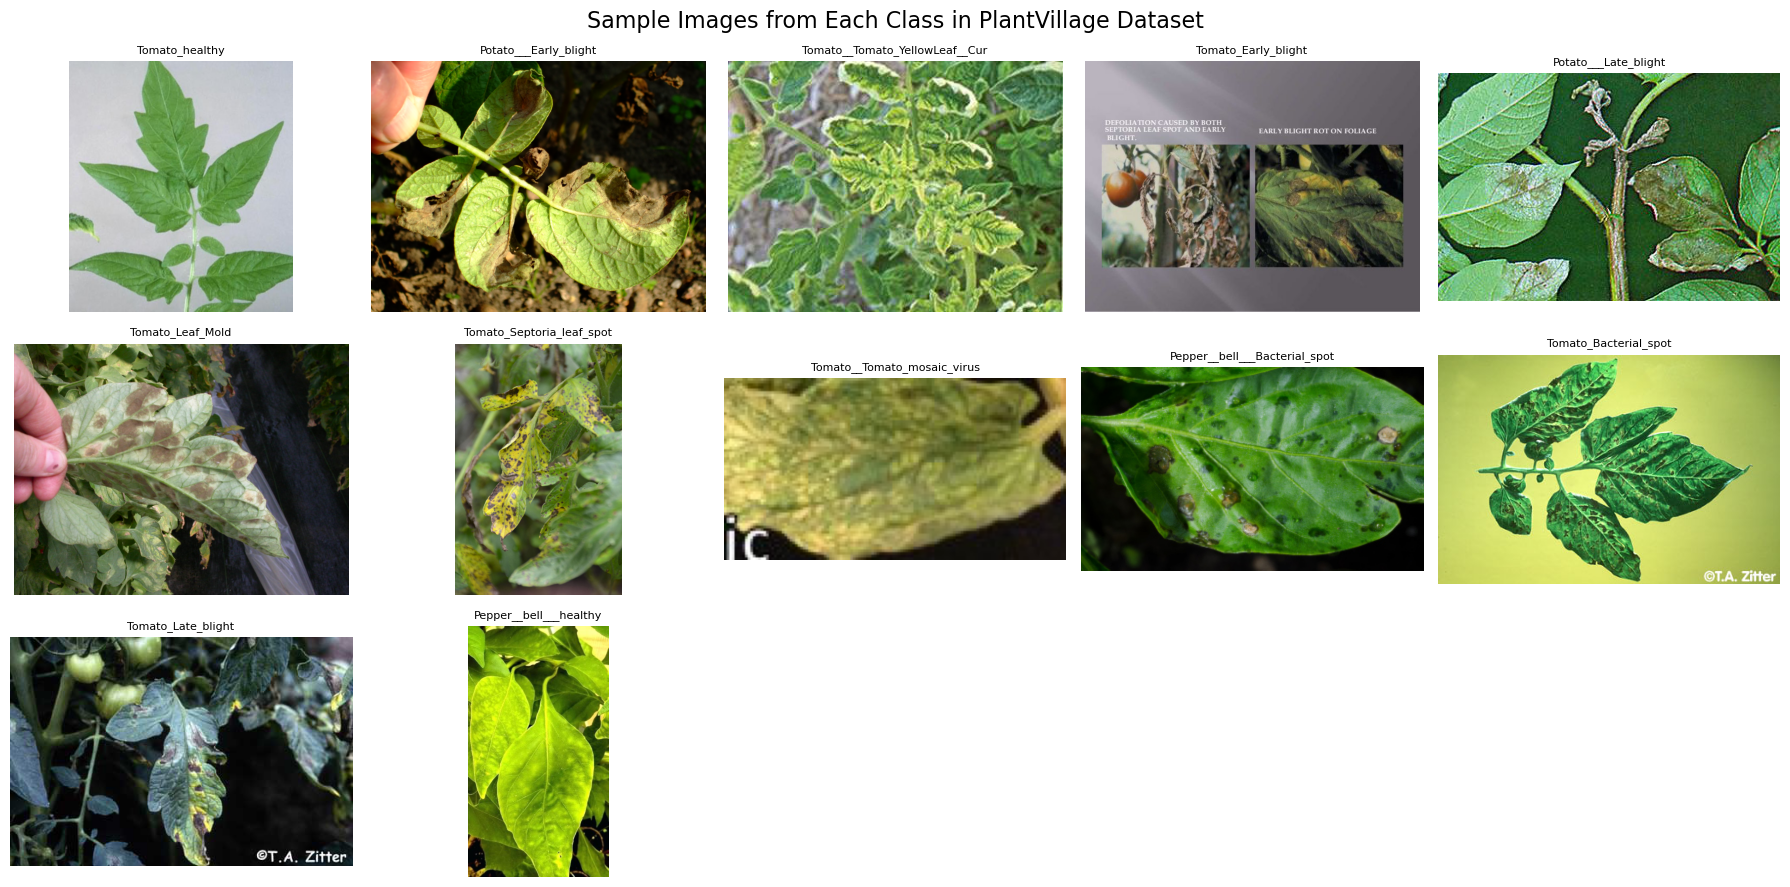

In [17]:
import random
from PIL import Image
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

cols = 5
rows = (len(classes) + cols - 1) // cols

plt.figure(figsize=(18, rows * 3))

for i, cls in enumerate(classes):
    folder = os.path.join(data_dir, cls)
    sample_img = random.choice(os.listdir(folder))
    img_path = os.path.join(folder, sample_img)

    img = Image.open(img_path)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(cls[:30], fontsize=8)
    plt.axis('off')

plt.suptitle("Sample Images from Each Class in PlantVillage Dataset", fontsize=16)
plt.tight_layout()
plt.show()

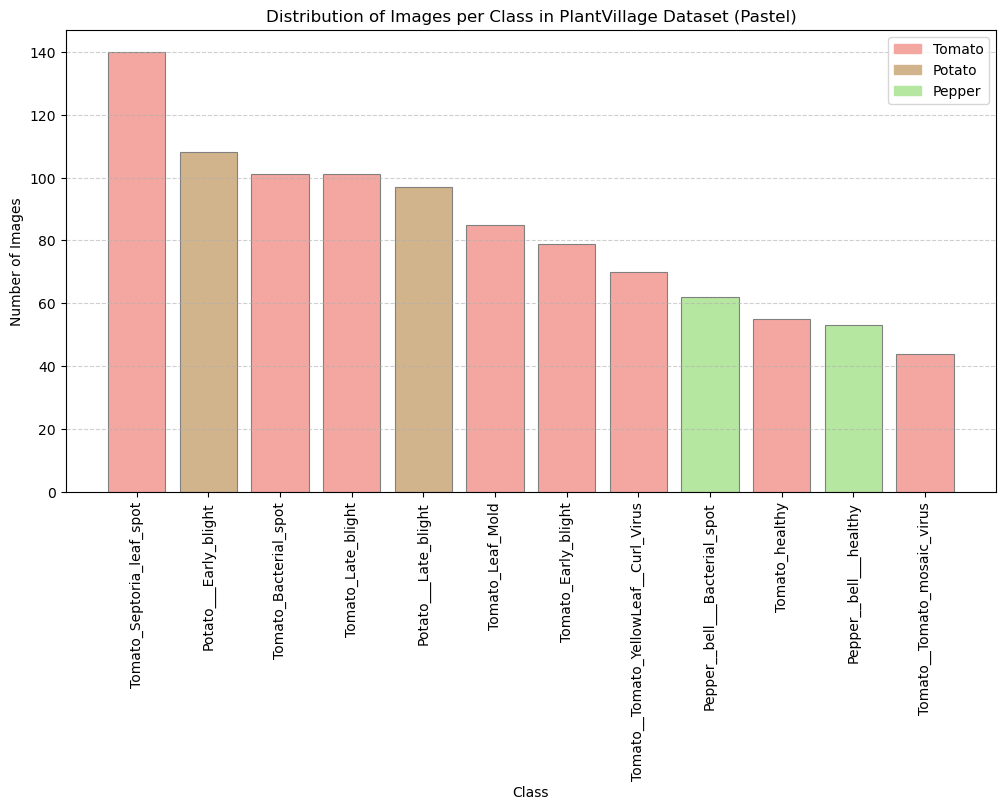

In [22]:
pastel_colors = {
    'Tomato': '#f4a7a1',  
    'Potato': '#d2b48c', 
    'Pepper': '#b5e7a0',  
    'Other':  '#aec6cf'   
}

colors = []
for cls in class_counts.keys():
    if 'Tomato' in cls:
        colors.append(pastel_colors['Tomato'])
    elif 'Potato' in cls:
        colors.append(pastel_colors['Potato'])
    elif 'Pepper' in cls:
        colors.append(pastel_colors['Pepper'])
    else:
        colors.append(pastel_colors['Other'])

plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color=colors, edgecolor='gray', linewidth=0.8)
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class in PlantVillage Dataset (Pastel)')
plt.grid(axis='y', linestyle='--', alpha=0.6)


legend_patches = [
    mpatches.Patch(color=pastel_colors['Tomato'], label='Tomato'),
    mpatches.Patch(color=pastel_colors['Potato'], label='Potato'),
    mpatches.Patch(color=pastel_colors['Pepper'], label='Pepper')
]
plt.legend(handles=legend_patches, loc='upper right')

plt.show()

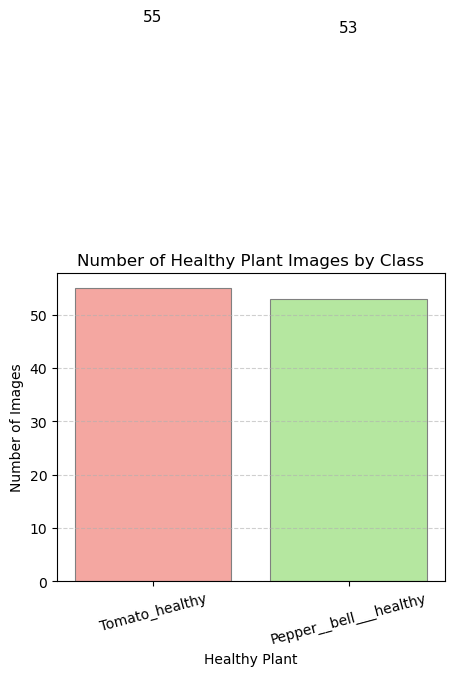

In [24]:
healthy_classes = {cls: count for cls, count in class_counts.items() if 'healthy' in cls.lower()}

healthy_colors = []
for cls in healthy_classes.keys():
    if 'Tomato' in cls:
        healthy_colors.append(pastel_colors['Tomato'])
    elif 'Potato' in cls:
        healthy_colors.append(pastel_colors['Potato'])
    elif 'Pepper' in cls:
        healthy_colors.append(pastel_colors['Pepper'])
    else:
        healthy_colors.append(pastel_colors['Other'])

plt.figure(figsize=(5, 4))
plt.bar(healthy_classes.keys(), healthy_classes.values(), color=healthy_colors, edgecolor='gray', linewidth=0.8)
plt.xticks(rotation=15)
plt.xlabel('Healthy Plant')
plt.ylabel('Number of Images')
plt.title('Number of Healthy Plant Images by Class')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, (cls, val) in enumerate(healthy_classes.items()):
    plt.text(i, val + 50, str(val), ha='center', fontsize=11)

plt.show()


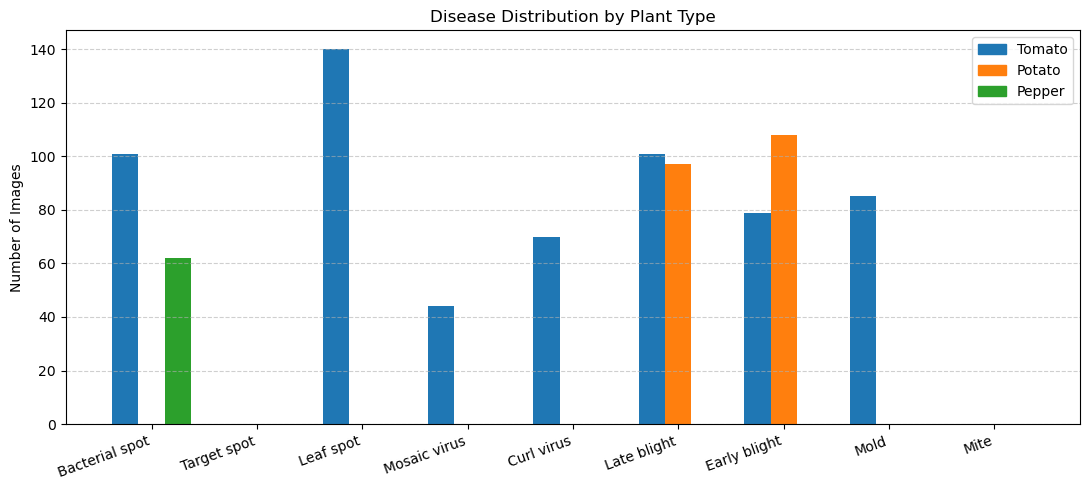

In [23]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

labels = [
    'Bacterial spot', 'Target spot', 'Leaf spot',
    'Mosaic virus', 'Curl virus',
    'Late blight', 'Early blight', 'Mold', 'Mite'
]

patterns = {
    'Bacterial spot': r'bacterial[_ ]?spot',
    'Target spot'   : r'target[_ ]?spot',
    'Leaf spot'     : r'(?:septoria[_ ]?leaf[_ ]?spot|leaf[_ ]?spot)',
    'Mosaic virus'  : r'mosaic',
    'Curl virus'    : r'curl',
    'Late blight'   : r'late[_ ]?blight',
    'Early blight'  : r'early[_ ]?blight',
    'Mold'          : r'(?:leaf[_ ]?)?mold',
    'Mite'          : r'(?:mite|spider(?:_|-)mites?|two[_ ]?spotted[_ ]?spider[_ ]?mite)'
}

plants = ['Tomato', 'Potato', 'Pepper']
counts = {p: {lab: 0 for lab in labels} for p in plants}

def plant_of(name):
    n = name.lower()
    if 'tomato' in n: return 'Tomato'
    if 'potato' in n: return 'Potato'
    if 'pepper' in n: return 'Pepper'
    return None

for cls, n in class_counts.items():
    p = plant_of(cls)
    if p is None:
        continue
    s = cls.lower()
    for lab, pat in patterns.items():
        if re.search(pat, s):
            counts[p][lab] += n
            break


x = np.arange(len(labels))
w = 0.25
tomato_vals = [counts['Tomato'][lab] for lab in labels]
potato_vals = [counts['Potato'][lab] for lab in labels]
pepper_vals = [counts['Pepper'][lab] for lab in labels]


col_tomato = '#1f77b4'
col_potato = '#ff7f0e'
col_pepper = '#2ca02c'

fig, ax = plt.subplots(figsize=(11, 5))
bt = ax.bar(x - w, tomato_vals,  width=w, color=col_tomato, label='Tomato')
bp = ax.bar(x,       potato_vals, width=w, color=col_potato, label='Potato')
bg = ax.bar(x + w,   pepper_vals, width=w, color=col_pepper, label='Pepper')

ax.set_xticks(x, labels, rotation=20, ha='right')
ax.set_ylabel('Number of Images')
ax.set_title('Disease Distribution by Plant Type')
ax.grid(axis='y', linestyle='--', alpha=0.6)

legend_handles = [
    Patch(color=col_tomato, label='Tomato'),
    Patch(color=col_potato, label='Potato'),
    Patch(color=col_pepper, label='Pepper')
]
ax.legend(handles=legend_handles, loc='best')

plt.tight_layout()
plt.show()

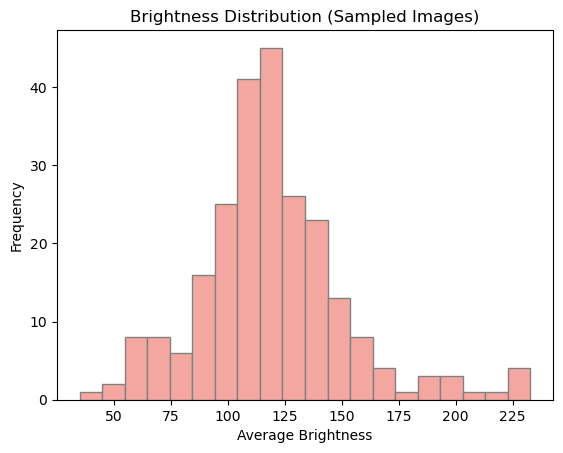

Processed 239 images successfully.


In [15]:
from PIL import Image, ImageStat
import matplotlib.pyplot as plt
import os

brightness = []
for cls in os.listdir(data_dir):
    folder = os.path.join(data_dir, cls)
    if os.path.isdir(folder):
        for img_name in os.listdir(folder)[:20]:  
            img_path = os.path.join(folder, img_name)
            try:
                img = Image.open(img_path).convert('L')  
                stat = ImageStat.Stat(img)
                brightness.append(stat.mean[0])
            except Exception as e:
                continue

plt.hist(brightness, bins=20, color='#f4a7a1', edgecolor='gray')
plt.title("Brightness Distribution (Sampled Images)")
plt.xlabel("Average Brightness")
plt.ylabel("Frequency")
plt.show()

print(f"Processed {len(brightness)} images successfully.")


In [12]:
# SPLITTED DATA WITH AUGUMENTATION 

# import zipfile
# import os
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import shutil
# import random
# from PIL import Image
# from torchvision import transforms
# from torchvision.transforms import functional as F
# import torch

# output_dir = './base_augmented_dataset'

# if os.path.exists(output_dir):
#     shutil.rmtree(output_dir)


# os.makedirs(output_dir, exist_ok=True)


# train_transform = transforms.Compose([
#     transforms.RandomRotation(15), 
#     transforms.RandomHorizontalFlip(p=0.5), 
#     transforms.RandomAffine(0, scale=(0.9, 1.1)),  
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  
# ])

# def get_all_image_paths(class_path):
#     image_paths = []
#     for root, dirs, files in os.walk(class_path):
#         for file in files:
#             if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
#                 image_paths.append(os.path.join(root, file))
#     return image_paths

# def split_and_process_dataset():
#     for class_name in classes:
#         print(f"Processing class: {class_name}")
        
#         class_path = os.path.join(data_dir, class_name)
        
#         all_images = get_all_image_paths(class_path)
#         image_names = [os.path.basename(img_path) for img_path in all_images]
        
#         random.shuffle(all_images)  
        
#         total_images = len(all_images)
#         train_count = int(0.7 * total_images)
#         val_count = int(0.15 * total_images)
#         test_count = total_images - train_count - val_count
        
#         # Split images
#         train_images = all_images[:train_count]
#         val_images = all_images[train_count:train_count + val_count]
#         test_images = all_images[train_count + val_count:]
        
#         # Create class directory and split subdirectories
#         class_output_dir = os.path.join(output_dir, class_name)
#         train_class_dir = os.path.join(class_output_dir, 'train')
#         val_class_dir = os.path.join(class_output_dir, 'validation')
#         test_class_dir = os.path.join(class_output_dir, 'test')
        
#         os.makedirs(train_class_dir, exist_ok=True)
#         os.makedirs(val_class_dir, exist_ok=True)
#         os.makedirs(test_class_dir, exist_ok=True)
        
#         print(f"  - Processing {len(train_images)} training images with augmentations...")
#         for i, img_path in enumerate(train_images):
#             try:
#                 # Load image
#                 image = Image.open(img_path).convert('RGB')
                
#                 # Apply augmentations
#                 augmented_image = train_transform(image)
                
#                 # Convert back to PIL Image and save
#                 if isinstance(augmented_image, torch.Tensor):
#                     augmented_image = transforms.ToPILImage()(augmented_image)
                
#                 # Create unique filename to avoid conflicts
#                 base_name = os.path.basename(img_path)
#                 name, ext = os.path.splitext(base_name)
#                 output_filename = f"{name}_augmented{ext}"
#                 output_path = os.path.join(train_class_dir, output_filename)
                
#                 augmented_image.save(output_path)
                
#             except Exception as e:
#                 print(f"Error processing {img_path}: {e}")
        
#         # Process validation images (no augmentations)
#         print(f"  - Copying {len(val_images)} validation images...")
#         for img_path in val_images:
#             try:
#                 base_name = os.path.basename(img_path)
#                 output_path = os.path.join(val_class_dir, base_name)
#                 shutil.copy2(img_path, output_path)
#             except Exception as e:
#                 print(f"Error copying {img_path}: {e}")
        
#         # Process test images (no augmentations)
#         print(f"  - Copying {len(test_images)} test images...")
#         for img_path in test_images:
#             try:
#                 base_name = os.path.basename(img_path)
#                 output_path = os.path.join(test_class_dir, base_name)
#                 shutil.copy2(img_path, output_path)
#             except Exception as e:
#                 print(f"Error copying {img_path}: {e}")
        
#         print(f"  ✓ Completed: Train({len(train_images)}), Val({len(val_images)}), Test({len(test_images)})")


# print("\nSplitting dataset and applying augmentations...")
# split_and_process_dataset()

# # Create zip file
# print("\nCreating zip file...")
# zip_path = './base_augmented_dataset.zip'

# with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     for root, dirs, files in os.walk(output_dir):
#         for file in files:
#             file_path = os.path.join(root, file)
#             # Preserve the directory structure in the zip
#             arcname = os.path.relpath(file_path, '.')
#             zipf.write(file_path, arcname)

# print(f"Dataset successfully processed and saved as {zip_path}")


# print("\nFinal dataset statistics:")
# for class_name in classes:
#     class_path = os.path.join(output_dir, class_name)
#     if os.path.exists(class_path):
#         print(f"\n{class_name}:")
#         for split in ['train', 'validation', 'test']:
#             split_path = os.path.join(class_path, split)
#             if os.path.exists(split_path):
#                 split_count = len([f for f in os.listdir(split_path) 
#                                  if os.path.isfile(os.path.join(split_path, f)) and 
#                                  f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))])
#                 print(f"  {split}: {split_count} images")


# print("\n" + "="*50)
# print("TOTAL SUMMARY:")
# total_train = total_val = total_test = 0
# for class_name in classes:
#     class_path = os.path.join(output_dir, class_name)
#     for split in ['train', 'validation', 'test']:
#         split_path = os.path.join(class_path, split)
#         if os.path.exists(split_path):
#             count = len([f for f in os.listdir(split_path) 
#                         if os.path.isfile(os.path.join(split_path, f)) and 
#                         f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))])
#             if split == 'train':
#                 total_train += count
#             elif split == 'validation':
#                 total_val += count
#             elif split == 'test':
#                 total_test += count

# print(f"Total training images: {total_train}")
# print(f"Total validation images: {total_val}")
# print(f"Total test images: {total_test}")
# print(f"Grand total: {total_train + total_val + total_test}")

# # Clean up temporary directory
# shutil.rmtree(output_dir)
# print("\nTemporary directory cleaned up.")
# print("Process completed successfully!")

In [11]:
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import shutil
import random
from PIL import Image
from torchvision import transforms
from torchvision.transforms import functional as F
import torch
import numpy as np

output_dir = './splitted_dataset'

if os.path.exists(output_dir):
    shutil.rmtree(output_dir)

os.makedirs(output_dir, exist_ok=True)

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

def get_all_image_paths(class_path):
    image_paths = []
    for root, dirs, files in os.walk(class_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                image_paths.append(os.path.join(root, file))
    return image_paths

def split_and_process_dataset():
    for class_name in classes:
        print(f"Processing class: {class_name}")
        
        class_path = os.path.join(data_dir, class_name)
        
        all_images = get_all_image_paths(class_path)
        image_names = [os.path.basename(img_path) for img_path in all_images]
        
        random.shuffle(all_images)  
        
        total_images = len(all_images)
        train_count = int(0.7 * total_images)
        val_count = int(0.15 * total_images)
        test_count = total_images - train_count - val_count
        
        # Split images
        train_images = all_images[:train_count]
        val_images = all_images[train_count:train_count + val_count]
        test_images = all_images[train_count + val_count:]
        
        # Create class directory and split subdirectories
        class_output_dir = os.path.join(output_dir, class_name)
        train_class_dir = os.path.join(class_output_dir, 'train')
        val_class_dir = os.path.join(class_output_dir, 'validation')
        test_class_dir = os.path.join(class_output_dir, 'test')
        
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)
        
        # Process training images (no augmentations)
        print(f"  - Copying {len(train_images)} training images...")
        for img_path in train_images:
            try:
                base_name = os.path.basename(img_path)
                output_path = os.path.join(train_class_dir, base_name)
                shutil.copy2(img_path, output_path)
            except Exception as e:
                print(f"Error copying {img_path}: {e}")
        
        # Process validation images (no augmentations)
        print(f"  - Copying {len(val_images)} validation images...")
        for img_path in val_images:
            try:
                base_name = os.path.basename(img_path)
                output_path = os.path.join(val_class_dir, base_name)
                shutil.copy2(img_path, output_path)
            except Exception as e:
                print(f"Error copying {img_path}: {e}")
        
        # Process test images (no augmentations)
        print(f"  - Copying {len(test_images)} test images...")
        for img_path in test_images:
            try:
                base_name = os.path.basename(img_path)
                output_path = os.path.join(test_class_dir, base_name)
                shutil.copy2(img_path, output_path)
            except Exception as e:
                print(f"Error copying {img_path}: {e}")
        
        print(f"  ✓ Completed: Train({len(train_images)}), Val({len(val_images)}), Test({len(test_images)})")


print("\nSplitting dataset...")
split_and_process_dataset()

# Create zip file
print("\nCreating zip file...")
zip_path = './splitted_dataset.zip'

with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            file_path = os.path.join(root, file)
            # Preserve the directory structure in the zip
            arcname = os.path.relpath(file_path, '.')
            zipf.write(file_path, arcname)

print(f"Dataset successfully processed and saved as {zip_path}")


print("\nFinal dataset statistics:")
for class_name in classes:
    class_path = os.path.join(output_dir, class_name)
    if os.path.exists(class_path):
        print(f"\n{class_name}:")
        for split in ['train', 'validation', 'test']:
            split_path = os.path.join(class_path, split)
            if os.path.exists(split_path):
                split_count = len([f for f in os.listdir(split_path) 
                                 if os.path.isfile(os.path.join(split_path, f)) and 
                                 f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))])
                print(f"  {split}: {split_count} images")


print("\n" + "="*50)
print("TOTAL SUMMARY:")
total_train = total_val = total_test = 0
for class_name in classes:
    class_path = os.path.join(output_dir, class_name)
    for split in ['train', 'validation', 'test']:
        split_path = os.path.join(class_path, split)
        if os.path.exists(split_path):
            count = len([f for f in os.listdir(split_path) 
                        if os.path.isfile(os.path.join(split_path, f)) and 
                        f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))])
            if split == 'train':
                total_train += count
            elif split == 'validation':
                total_val += count
            elif split == 'test':
                total_test += count

print(f"Total training images: {total_train}")
print(f"Total validation images: {total_val}")
print(f"Total test images: {total_test}")
print(f"Grand total: {total_train + total_val + total_test}")

# Clean up temporary directory
shutil.rmtree(output_dir)
print("\nTemporary directory cleaned up.")
print("Process completed successfully!")


Splitting dataset...
Processing class: Tomato_healthy
  - Copying 2227 training images...
  - Copying 477 validation images...
  - Copying 478 test images...
  ✓ Completed: Train(2227), Val(477), Test(478)
Processing class: Potato___Early_blight
  - Copying 1400 training images...
  - Copying 300 validation images...
  - Copying 300 test images...
  ✓ Completed: Train(1400), Val(300), Test(300)
Processing class: Tomato__Tomato_YellowLeaf__Curl_Virus
  - Copying 4491 training images...
  - Copying 962 validation images...
  - Copying 963 test images...
  ✓ Completed: Train(4491), Val(962), Test(963)
Processing class: Tomato_Early_blight
  - Copying 1400 training images...
  - Copying 300 validation images...
  - Copying 300 test images...
  ✓ Completed: Train(1400), Val(300), Test(300)
Processing class: Tomato__Target_Spot
  - Copying 1965 training images...
  - Copying 421 validation images...
  - Copying 422 test images...
  ✓ Completed: Train(1965), Val(421), Test(422)
Processing cl